5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


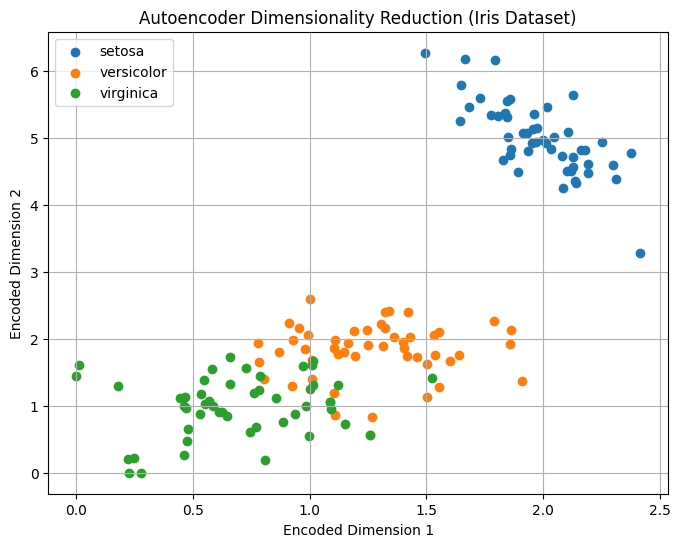

In [8]:
# Question 4: Autoencoders for Dimensionality Reduction using Keras
# Description: Implement a simple autoencoder using Keras to reduce dimensionality.
import os
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# Set TensorFlow to use only CPU if no GPU available
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Suppress TensorFlow logs
tf.config.set_visible_devices([], 'GPU')  # Disable GPU usage

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

input_dim = X.shape[1]
encoding_dim = 2

input_layer = Input(shape=(input_dim,))
encoded = Dense(4, activation='relu')(input_layer)
encoded = Dense(encoding_dim, activation='relu')(encoded)
decoded = Dense(4, activation='relu')(encoded)
output_layer = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(input_layer, output_layer)
encoder = Model(input_layer, encoded)

autoencoder.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

autoencoder.fit(X_train, X_train,
                epochs=100,
                batch_size=8,
                shuffle=True,
                validation_data=(X_test, X_test),
                verbose=0)

X_encoded = encoder.predict(X_scaled)

plt.figure(figsize=(8, 6))
for i, label in enumerate(target_names):
    plt.scatter(X_encoded[y == i, 0], X_encoded[y == i, 1], label=label)

plt.title("Autoencoder Dimensionality Reduction (Iris Dataset)")
plt.xlabel("Encoded Dimension 1")
plt.ylabel("Encoded Dimension 2")
plt.legend()
plt.grid(True)
plt.show()
